
#Preprocessing Google Apps Review - Sriwijaya Air

In [13]:
!pip -q install nltk sastrawi textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.1 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [3]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Assuming the uploaded file is a CSV
  try:
    df_srirev = pd.read_csv(io.BytesIO(uploaded[fn]))
    print("Successfully loaded CSV into df_srirev")
  except pd.errors.ParserError:
      print(f"Error: Could not parse {fn} as a CSV. Please upload a valid CSV file.")
      df_srirev = pd.DataFrame() # Create an empty DataFrame if parsing fails
  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_srirev = pd.DataFrame()


Saving df_srirev to df_srirev (1)
User uploaded file "df_srirev (1)" with length 562725 bytes
Successfully loaded CSV into df_srirev


In [4]:
df_srirev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8355bc54-ba6c-4aed-b8b0-d54382377a33,Kun Harjiyanto,https://play-lh.googleusercontent.com/a-/ALV-U...,Never successfully checked in via the app 🤦🏻,1,0,80.0.2,2025-07-14 14:37:49,NaN,NaN,80.0.2
1,0ed0a91d-4d28-4afc-8e5b-b2acfeb59e1f,MOHAMAD YEO,https://play-lh.googleusercontent.com/a-/ALV-U...,VERI POWERNYA.,5,0,80.0.2,2025-06-18 04:10:58,NaN,NaN,80.0.2
2,b53d54db-8550-4864-9479-d3a111a8015e,kevin zaprilan,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasi terburuk dari semua maskapai yang ada...,1,0,80.0.2,2025-05-03 11:44:18,NaN,NaN,80.0.2
3,30fbb445-5f76-4a2b-ae1e-9de3cb3d27b3,Dayvina Anaya,https://play-lh.googleusercontent.com/a/ACg8oc...,gooodd,5,0,80.0.2,2024-12-23 03:43:03,NaN,NaN,80.0.2
4,a8c494cd-ff78-4895-b1e7-ab1848ff76d6,Human Frontline,https://play-lh.googleusercontent.com/a-/ALV-U...,Penipu,1,0,80.0.2,2024-08-05 15:37:37,NaN,NaN,80.0.2
...,...,...,...,...,...,...,...,...,...,...,...
1794,9ba6be17-5ddc-4c0e-b754-d724887f1487,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi mudah di pakai siip,5,1,1.5,2015-10-20 01:48:55,NaN,NaN,1.5
1795,0494df9d-2125-48d5-8e61-078b23e01dfd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Good job,praktis,booking anytime,any where",5,0,1.5,2015-10-20 01:43:30,NaN,NaN,1.5
1796,1cb8cc3b-5a75-4a56-9873-65fe37943f8c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Keren,5,1,NaN,2015-10-20 01:17:54,NaN,NaN,NaN
1797,f63afdc5-5b24-4380-982d-d30116413904,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Great,5,0,NaN,2015-10-19 13:38:59,NaN,NaN,NaN


In [5]:
df_srirev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1799 non-null   object
 1   userName              1799 non-null   object
 2   userImage             1799 non-null   object
 3   content               1799 non-null   object
 4   score                 1799 non-null   int64 
 5   thumbsUpCount         1799 non-null   int64 
 6   reviewCreatedVersion  1396 non-null   object
 7   at                    1799 non-null   object
 8   replyContent          270 non-null    object
 9   repliedAt             270 non-null    object
 10  appVersion            1396 non-null   object
dtypes: int64(2), object(9)
memory usage: 154.7+ KB


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download Indonesian stopwords if not available
nltk.download('stopwords')
indonesian_stopwords = set(stopwords.words('indonesian'))

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_srirev[text_column].dropna().astype(str))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_srirev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Never successfully checked in via the app 🤦🏻,1,0,80.0.2,2025-07-14 14:37:49,NaN,NaN
1,VERI POWERNYA.,5,0,80.0.2,2025-06-18 04:10:58,NaN,NaN
2,aplikasi terburuk dari semua maskapai yang ada...,1,0,80.0.2,2025-05-03 11:44:18,NaN,NaN
3,gooodd,5,0,80.0.2,2024-12-23 03:43:03,NaN,NaN
4,Penipu,1,0,80.0.2,2024-08-05 15:37:37,NaN,NaN
...,...,...,...,...,...,...,...
1794,Aplikasi mudah di pakai siip,5,1,1.5,2015-10-20 01:48:55,NaN,NaN
1795,"Good job,praktis,booking anytime,any where",5,0,1.5,2015-10-20 01:43:30,NaN,NaN
1796,Keren,5,1,NaN,2015-10-20 01:17:54,NaN,NaN
1797,Great,5,0,NaN,2015-10-19 13:38:59,NaN,NaN


##Imports & unduh resource NLTK

In [14]:
import re
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob

# download data untuk tokenizer, stopwords, lemmatizer
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# resources
stop_en = set(stopwords.words("english"))
stop_id = set(stopwords.words("indonesian"))
STOP_ALL = stop_en | stop_id

lemmatizer_en = WordNetLemmatizer()
porter_en = PorterStemmer()
stemmer_id = StemmerFactory().create_stemmer()

# contractions (EN)
CONTRACTIONS = {
    "don't":"do not","doesn't":"does not","didn't":"did not","can't":"cannot",
    "won't":"will not","isn't":"is not","aren't":"are not","i'm":"i am",
    "you're":"you are","we're":"we are","they're":"they are","i've":"i have",
    "you've":"you have","we've":"we have","they've":"they have","i'll":"i will",
    "you'll":"you will","we'll":"we will","they'll":"they will","it's":"it is",
    "that's":"that is","there's":"there is","what's":"what is"
}

# normalisasi slang ID
ID_NORMALIZE = {
    "ga":"tidak","gak":"tidak","gk":"tidak","ga":"tidak","enggak":"tidak","nggak":"tidak","tdk":"tidak",
    "yg":"yang","tp":"tapi","dr":"dari","jd":"jadi","jg":"juga","klo":"kalau","kl":"kalau",
    "sya":"saya","sy":"saya","bgt":"banget","bener2":"benar","gpp":"tidak apa apa",
    "aplikasinya":"aplikasi"
}


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##Muat data + RAW save

In [15]:
# Jika df_srirev belum ada, upload CSV (pastikan ada kolom 'content')
try:
    assert isinstance(df_srirev, pd.DataFrame) and "content" in df_srirev.columns
except:
    from google.colab import files
    up = files.upload()  # pilih CSV hasil scraping
    fn = list(up.keys())[0]
    df_srirev = pd.read_csv(fn)

# simpan raw (sesuai instruksi)
df_srirev.to_csv("SriwijayaAir_RAW.csv", index=False)
print("RAW saved -> SriwijayaAir_RAW.csv, rows:", len(df_srirev))
df_srirev.head(3)


RAW saved -> SriwijayaAir_RAW.csv, rows: 1799


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8355bc54-ba6c-4aed-b8b0-d54382377a33,Kun Harjiyanto,https://play-lh.googleusercontent.com/a-/ALV-U...,Never successfully checked in via the app 🤦🏻,1,0,80.0.2,2025-07-14 14:37:49,NaN,NaN,80.0.2
1,0ed0a91d-4d28-4afc-8e5b-b2acfeb59e1f,MOHAMAD YEO,https://play-lh.googleusercontent.com/a-/ALV-U...,VERI POWERNYA.,5,0,80.0.2,2025-06-18 04:10:58,NaN,NaN,80.0.2
2,b53d54db-8550-4864-9479-d3a111a8015e,kevin zaprilan,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasi terburuk dari semua maskapai yang ada...,1,0,80.0.2,2025-05-03 11:44:18,NaN,NaN,80.0.2


##Lowercasing

In [27]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_srirev['content'] = df_srirev['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_srirev['content'][188])
print(df_srirev['content'][2])
print(df_srirev['content'][1700])

good
aplikasi terburuk dari semua maskapai yang ada.. yang register tidak bisa, mau check in pun error. jangan di-download.
Setiap kali mau cek rute dan bayar out dengan sendirinya. Yg berbasus web jome site juga buruk. Gak bisa diklik tanggal keberangkatan nya.


In [28]:
#Lowercase all reviews to see the difference
df_srirev['content']= df_srirev['content'].apply(lambda x: x.lower())
print(df_srirev['content'][188])
print(df_srirev['content'][2])
print(df_srirev['content'][1700])

good
aplikasi terburuk dari semua maskapai yang ada.. yang register tidak bisa, mau check in pun error. jangan di-download.
setiap kali mau cek rute dan bayar out dengan sendirinya. yg berbasus web jome site juga buruk. gak bisa diklik tanggal keberangkatan nya.


##Tokenization

In [29]:
def tokenize(text: str):
    if not isinstance(text, str):
        return []
    return nltk.word_tokenize(text)

# Download punkt_tab resource if not available
nltk.download('punkt_tab')

df = df_srirev.copy()
df["text_lower"] = df["content"].astype(str).apply(base_clean)  # Lowering + Punctuations + Expand Contractions
df["tokens"] = df["text_lower"].apply(tokenize)
print("Tokenization done.")
df[["content","tokens"]].head(3)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Tokenization done.


,content,tokens
0,never successfully checked in via the app 🤦🏻,"[never, successfully, checked, in, via, the, app]"
1,veri powernya.,"[veri, powernya]"
2,aplikasi terburuk dari semua maskapai yang ada...,"[aplikasi, terburuk, dari, semua, maskapai, ya..."


##Lemmatization (English)

In [30]:
def lemmatize_en(tokens):
    out = []
    for t in tokens:
        if re.fullmatch(r"[a-z]+", t):  # fokus English
            out.append(lemmatizer_en.lemmatize(t))
        else:
            out.append(t)
    return out

df["tokens_lemma"] = df["tokens"].apply(lemmatize_en)
print("Lemmatization done.")
df[["tokens","tokens_lemma"]].head(3)

Lemmatization done.


,tokens,tokens_lemma
0,"[never, successfully, checked, in, via, the, app]","[never, successfully, checked, in, via, the, app]"
1,"[veri, powernya]","[veri, powernya]"
2,"[aplikasi, terburuk, dari, semua, maskapai, ya...","[aplikasi, terburuk, dari, semua, maskapai, ya..."


## Stemming (Indonesia + English)

In [22]:
def stem_mix(tokens):
    # Sastrawi lebih baik jika kalimat utuh → stem dulu seluruh kalimat
    sent = " ".join(tokens)
    id_stemmed_sentence = stemmer_id.stem(sent)
    id_tokens = id_stemmed_sentence.split()

    # Porter untuk token English (alfabet latin semua)
    final = []
    for t in id_tokens:
        if re.fullmatch(r"[a-z]+", t):
            final.append(porter_en.stem(t))
        else:
            final.append(t)
    return final

df["tokens_stem"] = df["tokens_lemma"].apply(stem_mix)
print("Stemming done.")
df[["tokens_lemma","tokens_stem"]].head(3)


Stemming done.


,tokens_lemma,tokens_stem
0,"[never, successfully, checked, in, via, the, app]","[never, success, check, in, via, the, app]"
1,"[veri, powernya]","[veri, powernya]"
2,"[aplikasi, terburuk, dari, semua, maskapai, ya...","[aplikasi, buruk, dari, semua, maskapai, yang,..."


##Stopwords Removal

In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
print(len(indonesian_stopwords))

758


,Word,Frequency
0,aplikasi,249
1,sriwijaya,244
2,tiket,161
3,gak,140
4,ga,127
...,...,...
95,susah,20
96,mempermudah,20
97,apk,20
98,for,19


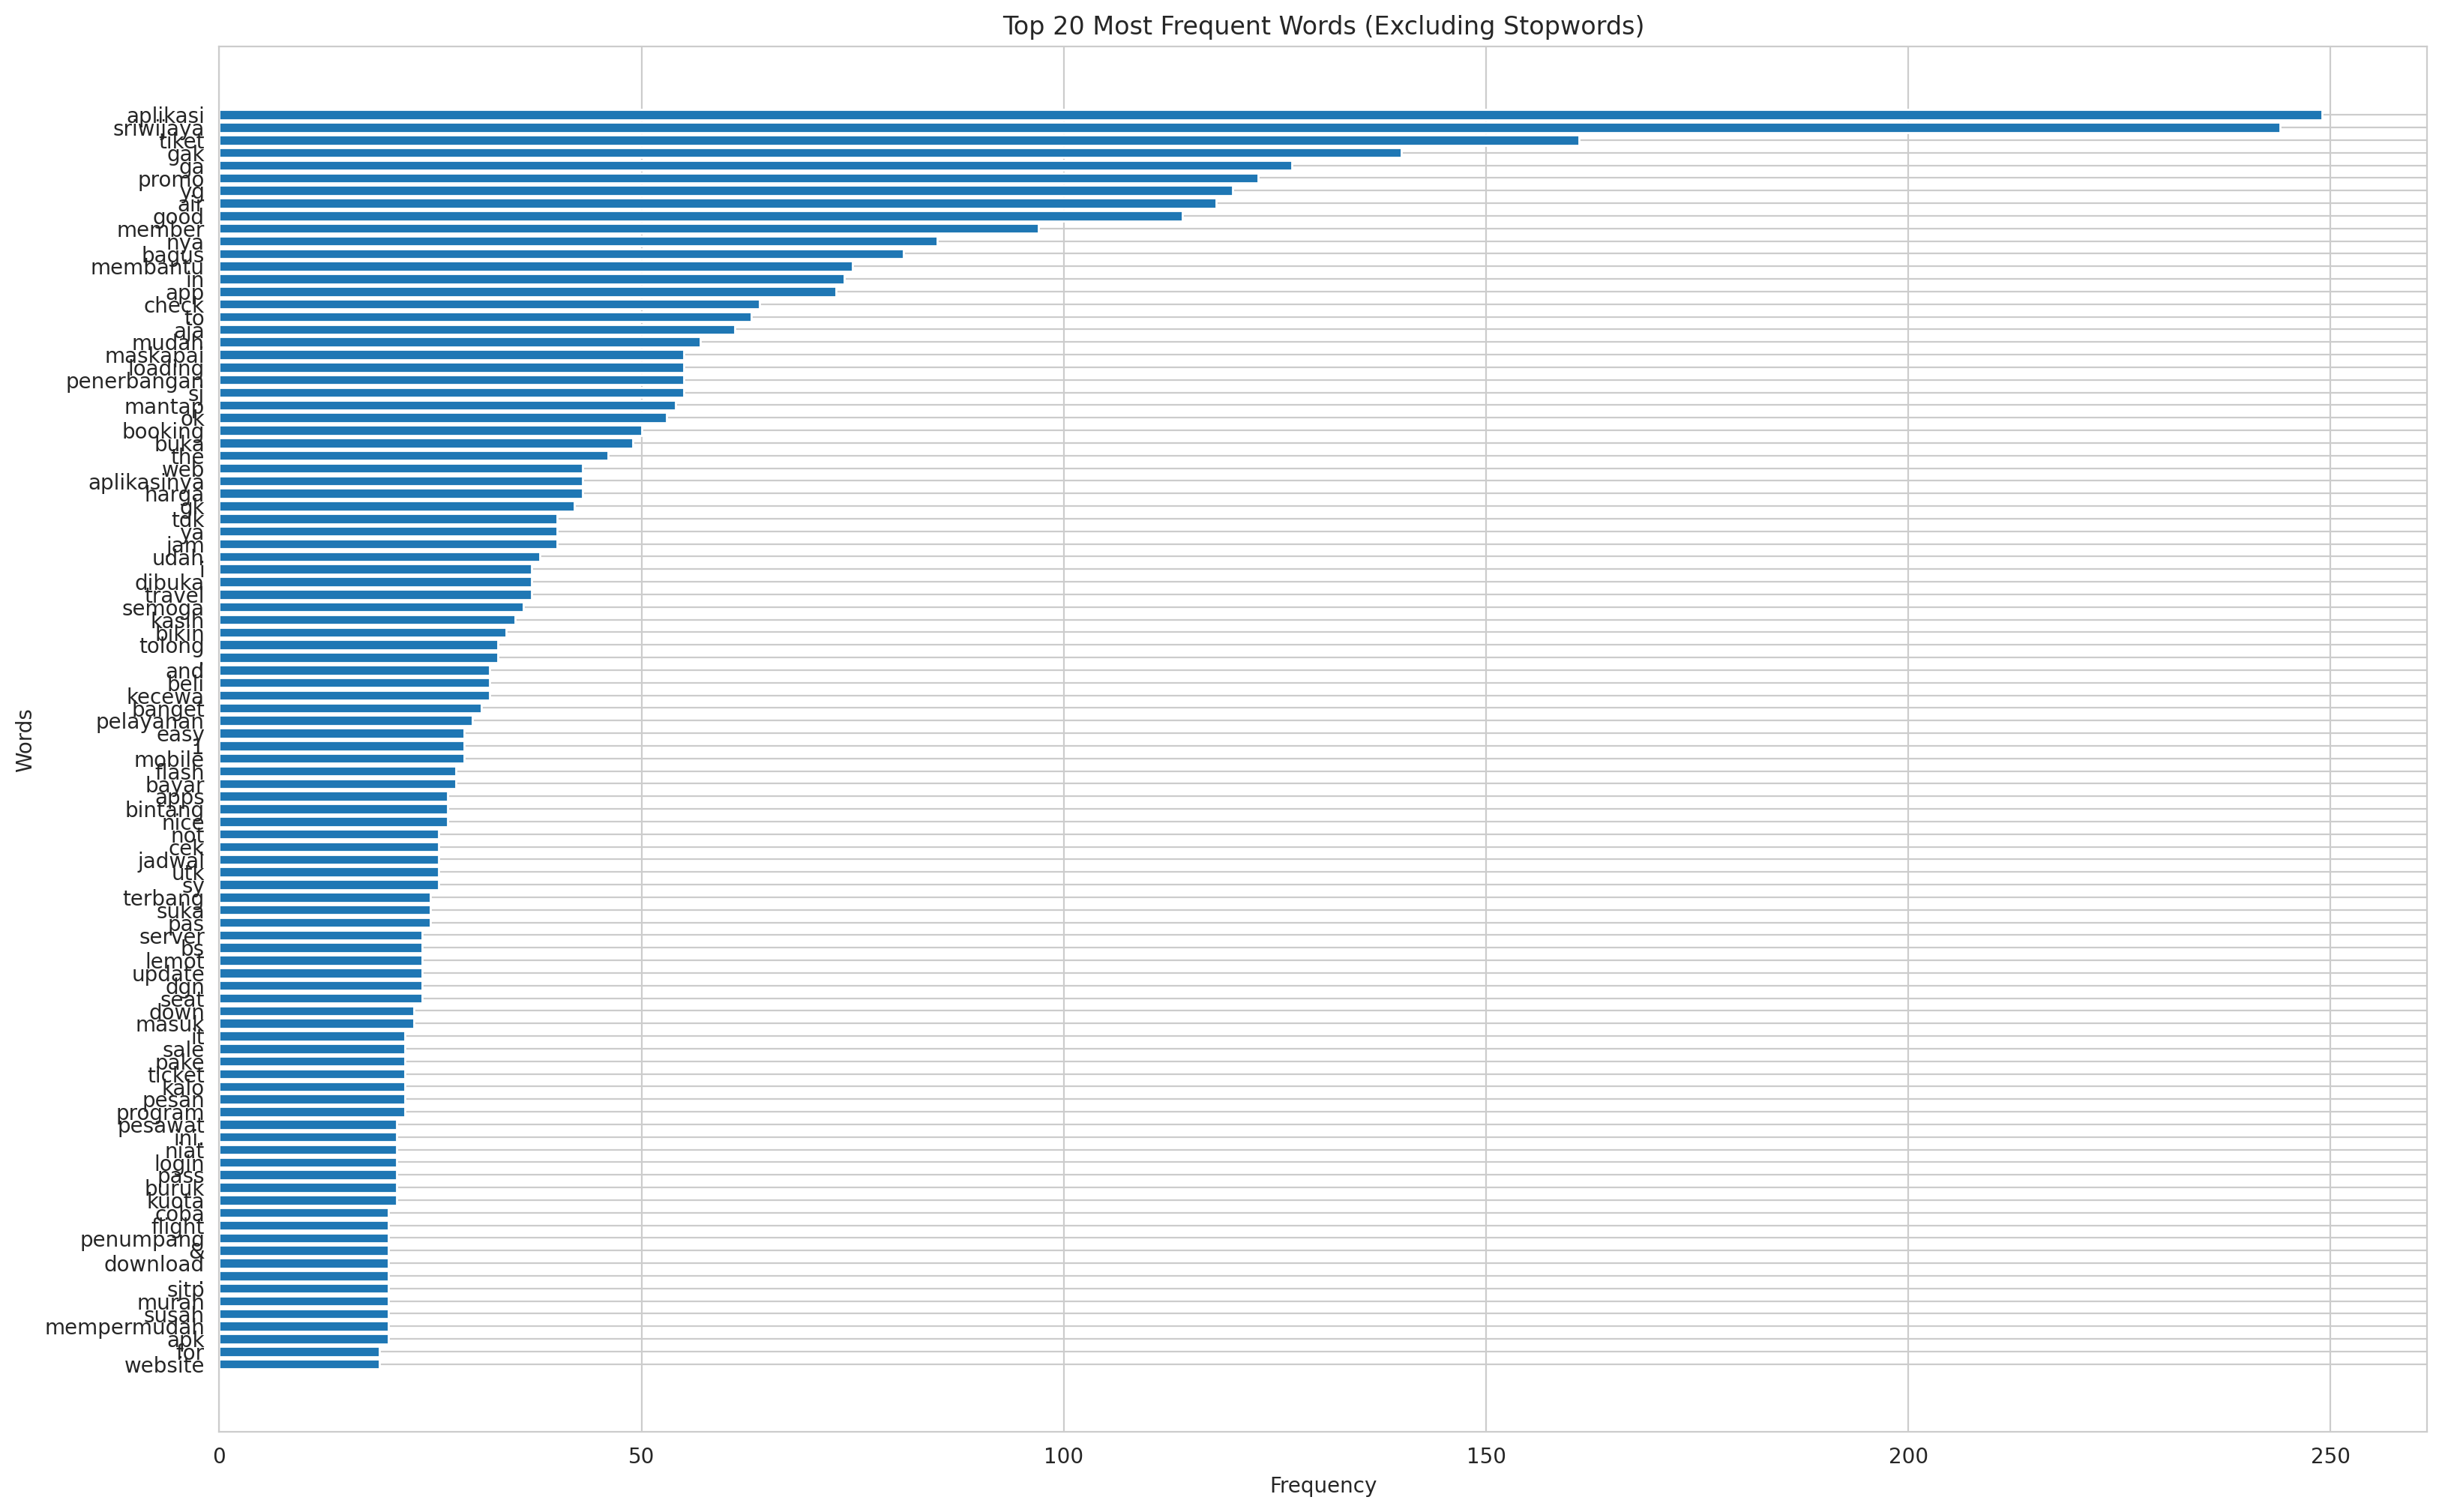

In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_srirev[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.show()

In [33]:
common_words

[('aplikasi', 249),
 ('sriwijaya', 244),
 ('tiket', 161),
 ('gak', 140),
 ('ga', 127),
 ('promo', 123),
 ('yg', 120),
 ('air', 118),
 ('good', 114),
 ('member', 97),
 ('nya', 85),
 ('bagus', 81),
 ('membantu', 75),
 ('in', 74),
 ('app', 73),
 ('check', 64),
 ('to', 63),
 ('aja', 61),
 ('mudah', 57),
 ('maskapai', 55),
 ('loading', 55),
 ('penerbangan', 55),
 ('sj', 55),
 ('mantap', 54),
 ('ok', 53),
 ('booking', 50),
 ('buka', 49),
 ('the', 46),
 ('web', 43),
 ('aplikasinya', 43),
 ('harga', 43),
 ('gk', 42),
 ('tdk', 40),
 ('ya', 40),
 ('jam', 40),
 ('udah', 38),
 ('i', 37),
 ('dibuka', 37),
 ('travel', 37),
 ('semoga', 36),
 ('kasih', 35),
 ('bikin', 34),
 ('tolong', 33),
 (',', 33),
 ('and', 32),
 ('beli', 32),
 ('kecewa', 32),
 ('banget', 31),
 ('pelayanan', 30),
 ('easy', 29),
 ('1', 29),
 ('mobile', 29),
 ('flash', 28),
 ('bayar', 28),
 ('apps', 27),
 ('bintang', 27),
 ('nice', 27),
 ('not', 26),
 ('cek', 26),
 ('jadwal', 26),
 ('utk', 26),
 ('sy', 26),
 ('terbang', 25),
 ('suka'

In [34]:
def normalize_id(tokens):
    return [ID_NORMALIZE.get(t, t) for t in tokens]

def remove_stopwords(tokens):
    return [t for t in tokens if t not in STOP_ALL and len(t) > 1]

df["tokens_norm"] = df["tokens"].apply(normalize_id)
df["tokens_nostop"] = df["tokens_norm"].apply(remove_stopwords)
print("Stopword removal done.")
df[["tokens","tokens_nostop"]].head(3)

Stopword removal done.


,tokens,tokens_nostop
0,"[never, successfully, checked, in, via, the, app]","[never, successfully, checked, via, app]"
1,"[veri, powernya]","[veri, powernya]"
2,"[aplikasi, terburuk, dari, semua, maskapai, ya...","[aplikasi, terburuk, maskapai, register, check..."


## Visualisasi Frequent Words

/tmp/ipython-input-1119436349.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=freq_df, palette="viridis")


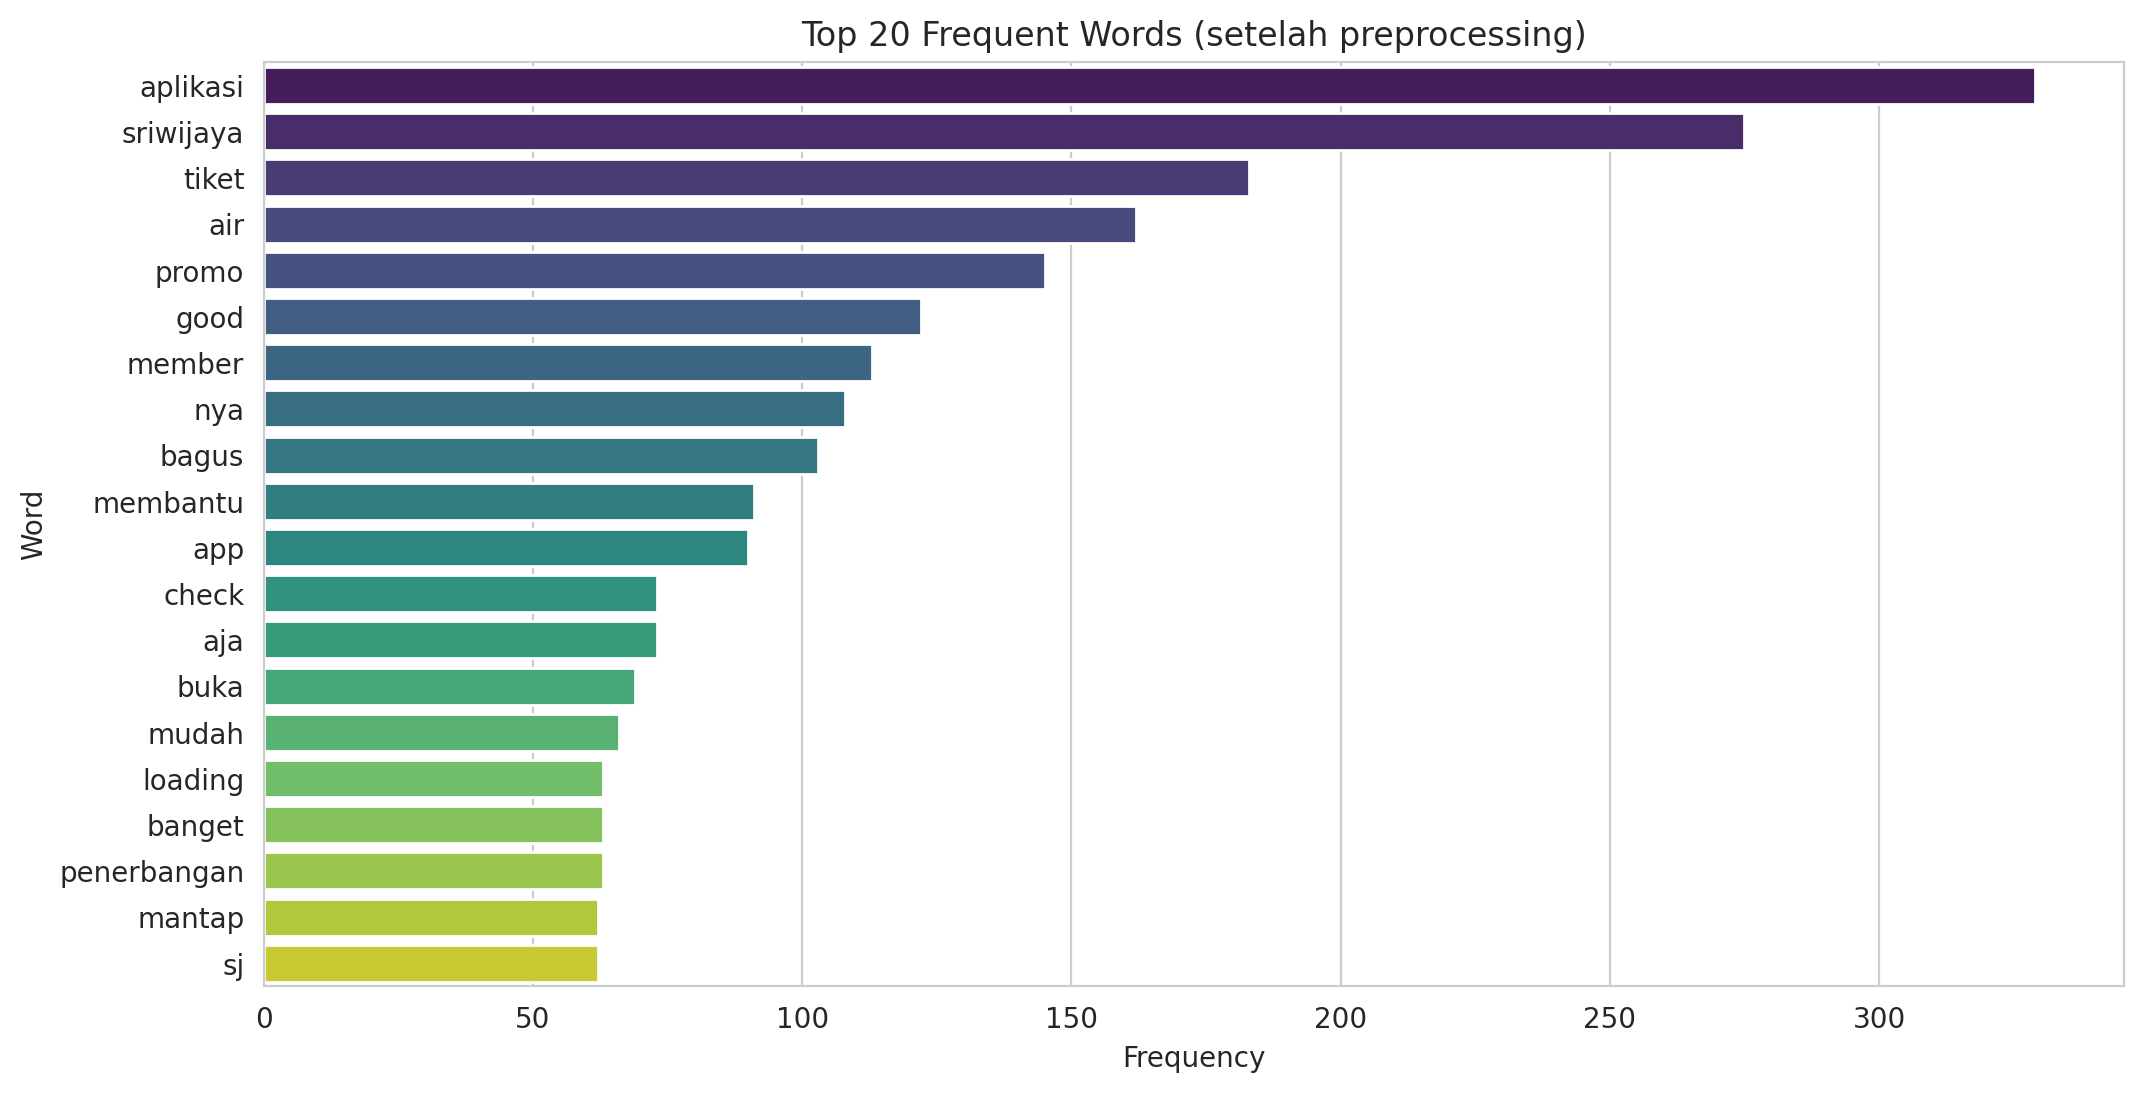

,word,count
0,aplikasi,329
1,sriwijaya,275
2,tiket,183
3,air,162
4,promo,145
5,good,122
6,member,113
7,nya,108
8,bagus,103
9,membantu,91


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# ambil token final (sesudah rare & common removal)
all_tokens_final = []
for toks in df["tokens_nostop"]:
    all_tokens_final.extend(toks)

freq_final = Counter(all_tokens_final)
top_n = 20  # tampilkan 20 kata paling sering
most_common = freq_final.most_common(top_n)

# buat DataFrame untuk visualisasi
freq_df = pd.DataFrame(most_common, columns=["word","count"])

plt.figure(figsize=(12,6))
sns.barplot(x="count", y="word", data=freq_df, palette="viridis")
plt.title(f"Top {top_n} Frequent Words (setelah preprocessing)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

freq_df

## Save Clean Dataset

In [37]:
df["clean_text"] = df["tokens_nostop"].apply(lambda toks: " ".join(toks))
keep_cols = [c for c in df.columns if c in df_srirev.columns] + ["clean_text"]

df_final = df[keep_cols]
df_final.to_csv("SriwijayaAir_Preprocessed_FINAL.csv", index=False)

print("Saved -> SriwijayaAir_Preprocessed_FINAL.csv")
print("Rows:", len(df_final), "| Cols:", len(df_final.columns))
df_final[["content","clean_text"]].head(10)

Saved -> SriwijayaAir_Preprocessed_FINAL.csv
Rows: 1799 | Cols: 12


,content,clean_text
0,never successfully checked in via the app 🤦🏻,never successfully checked via app
1,veri powernya.,veri powernya
2,aplikasi terburuk dari semua maskapai yang ada...,aplikasi terburuk maskapai register check erro...
3,gooodd,gooodd
4,penipu,penipu
5,"failed boarding print, send to email not worki...",failed boarding print send email working rejec...
6,"the app is not working at all, really bad serv...",app working really bad services
7,"bad apps! i cant register an account, even all...",bad apps cant register account even instructio...
8,i cant use online check in menu,cant use online check menu
9,cannot check in,check
